<a href="https://colab.research.google.com/github/harshadhande/First_Repo/blob/main/pandas_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
 ipl=pd.read_csv(r'/content/ipl-matches.csv',index_col='ID')
 ipl.sample(2)

 #ipl

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
ID,,,,,,,,,,,,,,,,,,,
1178402,Mumbai,2019-04-13,2019,27,Mumbai Indians,Rajasthan Royals,Wankhede Stadium,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,4.0,NaN,JC Buttler,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'KA Pol...","['AM Rahane', 'JC Buttler', 'SV Samson', 'SPD ...",A Nand Kishore,Nitin Menon
598066,Dharamsala,2013-05-18,2013,69,Kings XI Punjab,Mumbai Indians,Himachal Pradesh Cricket Association Stadium,Mumbai Indians,field,N,Kings XI Punjab,Runs,50.0,NaN,Azhar Mahmood,"['AC Gilchrist', 'Mandeep Singh', 'Azhar Mahmo...","['GJ Maxwell', 'AP Tare', 'AT Rayudu', 'RG Sha...",HDPK Dharmasena,CK Nandan


In [ ]:
ipl.columns

Index(['City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue',
       'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy',
       'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2'],
      dtype='object')

#Find all the final Winners

In [ ]:
mask=ipl['MatchNumber']=='Final'
new=ipl[mask]
new[['Season','WinningTeam']]

,Season,WinningTeam
ID,,
1312200,2022,Gujarat Titans
1254117,2021,Chennai Super Kings
1237181,2020/21,Mumbai Indians
1181768,2019,Mumbai Indians
1136620,2018,Chennai Super Kings
1082650,2017,Mumbai Indians
981019,2016,Sunrisers Hyderabad
829823,2015,Mumbai Indians
734049,2014,Kolkata Knight Riders


In [ ]:
#ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]
# same as above code but in short

#How many super over finishes have occured

In [ ]:
ipl[ipl['SuperOver']=='Y'].shape[0]

14

#How many matches has csk won in kolkata


In [ ]:
ipl[(ipl['City']=='Kolkata') & (ipl['WinningTeam']=='Chennai Super Kings')].shape[0]

5

#Toss winner is match winner in percentage



In [ ]:
(ipl[ipl['TossWinner']==ipl['WinningTeam']].shape[0]/ipl.shape[0])*100

51.473684210526315

In [ ]:
def head_to_head_data(abc,team_a,team_b):
    mask= ((abc['Team1']==team_a) & (abc['Team2']==team_b)) | ((abc['Team1']==team_b) & (abc['Team2']==team_a))
    match= abc[mask]

    team_a_wins=match[match['WinningTeam']==team_a].shape[0]
    team_b_wins=match[match['WinningTeam']==team_b].shape[0]
    total_matches=len(match)

    return{'total_matches':total_matches,
           f'{team_a} Wins': team_a_wins,
            f'{team_b} Wins': team_b_wins
    }
head_to_head_data(ipl, 'Kochi Tuskers Kerala', 'Deccan Chargers')


{'total_matches': 1, 'Kochi Tuskers Kerala Wins': 0, 'Deccan Chargers Wins': 1}

#Movies data

In [ ]:
movies=pd.read_csv(r'/content/movies.csv')
movies.sample(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
144,Helicopter Eela,tt8427036,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Helicopter_Eela,Helicopter Eela,Helicopter Eela,0,2018,135,Drama,5.5,796,Eela is an aspiring playback singer and single...,Eela is an aspiring playback singer and single...,She's here| She's there| She's everywhere!!!,Kajol|Riddhi Sen|Tota Roy Chowdhury|Neha Dhupia|,NaN,12 October 2018 (USA)
917,Raaz: The Mystery Continues,tt1340838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raaz_%E2%80%93_T...,Secret: The Mystery Continues,Raaz: The Mystery Continues,0,2009,151,Horror|Mystery|Romance,5.6,2976,Attractive ramp model Nandita Chopra has a b...,An artist comes to realize that the woman he h...,NaN,Kangana Ranaut|Adhyayan Suman|Emraan Hashmi|,NaN,23 January 2009 (India)
787,Phhir,tt2023645,https://upload.wikimedia.org/wikipedia/en/7/70...,https://en.wikipedia.org/wiki/Phhir,Phhir,Phhir,0,2011,100,Drama|Mystery|Romance,5.3,166,Manchester-based Dr. Kabir Malhotra is late at...,With the help of the police and a psychic a h...,NaN,Rajniesh Duggall|Roshni Chopra|Monica|Adah Sha...,NaN,12 August 2011 (USA)
809,Miley Naa Miley Hum,tt2104937,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Miley_naa_Miley_...,Miley - Naa Miley - Hum,Miley - Naa Miley - Hum,0,2011,114,Comedy|Drama|Romance,3.0,159,Chirag comes from a wealthy background and ass...,A tennis player incurs his pushy divorced pare...,NaN,Chirag Paswan|Kangana Ranaut|Neeru Bajwa|Sagar...,NaN,4 November 2011 (India)
1391,Sheen (film),tt0410954,NaN,https://en.wikipedia.org/wiki/Sheen_(film),Sheen,Sheen,0,2004,\N,Action|Drama,6.3,56,One would tend to think that the Indian Govern...,One would tend to think that the Indian Govern...,NaN,Tarun Arora|Sheen|,NaN,NaN


#Action movies with rating higher than 7.5


In [ ]:
# Action movies with rating higher than 7.5
# mask1 = movies['genres'].str.split('|').apply(lambda x:'Action' in x)
condition_1 = movies['genres'].str.contains('Action')
condition_2 = movies['imdb_rating'] > 7.5

movies[condition_1 & condition_2]
len(movies[condition_1 & condition_2])

33

#Add New Column in dataframe

In [ ]:
# completly new
movies['Country']='India'
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


In [ ]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [ ]:
movies.drop('Country',axis=1,inplace=True) #axis  in numpy


In [ ]:
#Man of the Matches/POTM in onlu Playoffs

In [ ]:
playoff_matches= ipl[~ipl['MatchNumber'].str.isdigit()]
potm_in_playoffs= playoff_matches['Player_of_Match']
potm_in_playoffs.value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


<Axes: ylabel='count'>

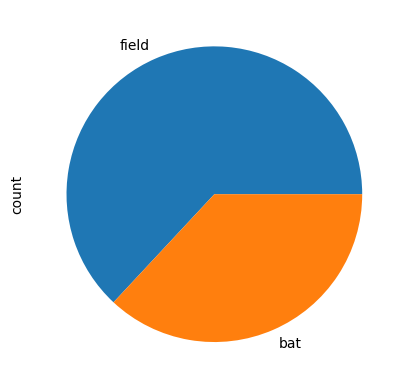

In [ ]:
#Toss decision Plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
ipl['Team2'].value_counts()

,count
Team2,
Mumbai Indians,119
Kolkata Knight Riders,118
Rajasthan Royals,103
Royal Challengers Bangalore,100
Kings XI Punjab,98
Chennai Super Kings,97
Sunrisers Hyderabad,83
Delhi Daredevils,76
Deccan Chargers,36


In [ ]:
ipl['Team1'].value_counts()

,count
Team1,
Royal Challengers Bangalore,126
Mumbai Indians,112
Chennai Super Kings,111
Kolkata Knight Riders,105
Kings XI Punjab,92
Rajasthan Royals,89
Delhi Daredevils,85
Sunrisers Hyderabad,69
Deccan Chargers,39


In [ ]:
#how many matches each team has played
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


In [ ]:
movies

#Sort Dataframe by year of release in ascending and title in Descending


In [ ]:

# ['B1', 'A0', 'D2', 'C1', 'A1', 'B0', 'C2', 'D0', 'B2', 'C0', 'D1', 'A2']
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


#Merging Concatenating Joining

In [ ]:
courses = pd.read_csv('/content/courses.csv',index_col='course_id')
students = pd.read_csv('/content/students.csv',index_col='student_id')
nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')
matches = pd.read_csv('/content/matches.csv',index_col='id')
delivery = pd.read_csv('/content/deliveries.csv')

In [ ]:
delivery.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
80549,342,1,Delhi Daredevils,Mumbai Indians,2,2,DPMD Jayawardene,V Sehwag,RP Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
161539,7940,1,Mumbai Indians,Rajasthan Royals,18,1,HH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [ ]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
regs=pd.concat([nov,dec])
#regs=pd.cocat([nov,dec],ignore_index=True)
regs


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
multi=pd.concat([nov,dec],keys=['Nov','Dec'])
multi
#Multiindex DataFrame
#multi.loc[('Dec',4)]
#multi.loc[('Dec',4),'student_id']


student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [ ]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


#1. Inner Join : Join rows having common values

In [ ]:
regs.sample(5)

,student_id,course_id
24,3,3
16,2,5
0,23,1
23,14,1
19,22,6


In [ ]:
students.sample(5)

,name,partner
student_id,,
11,David Mukhopadhyay,20
24,Radhika Suri,17
8,Radheshyam Dey,5
16,Elias Dodiya,25
13,Munni Varghese,24


#left join

In [ ]:
# left join
"""
For Left Join - how='left',
For Right Join - how='right',
For Inner Join - how='inner',
For Full Join - how='outer',
"""
courses.merge(regs,how='left',on='course_id') # right

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


#Find total revenue generated

In [ ]:
total=regs.merge(courses,how='inner',on='course_id')['price']
total

,price
0,2499
1,2499
2,1899
3,9999
4,699
5,2499
6,2499
7,1099
8,4999
9,2499


In [ ]:
total=regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

np.int64(154247)

# Plot bar chart for revenue/course

<Axes: xlabel='course_name'>

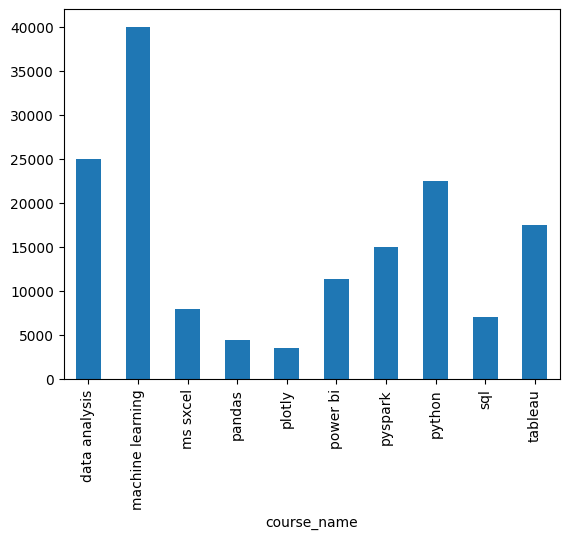

In [ ]:
# Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

#Find students' array who enrolled in both the months i.e. Nov and Dec

In [ ]:
# Find students' id array who enrolled in both the months i.e Nov and Dec
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [ ]:
students

,name,partner
student_id,,
1,Kailash Harjo,23
2,Esha Butala,1
3,Parveen Bhalla,3
4,Marlo Dugal,14
5,Kusum Bahri,6
6,Lakshmi Contractor,10
7,Tarun Thaker,9
8,Radheshyam Dey,5
9,Nitika Chatterjee,4


#Groupby

In [ ]:
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [ ]:
imdb_movies = pd.read_csv('/content/imdb-top-1000.csv')

In [ ]:
imdb_movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


In [ ]:
genres = imdb_movies.groupby('Genre')
genres

In [ ]:
# find the top 3 genres by total earning
genres.sum()['Gross'].sort_values(ascending=False).head(3)

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [ ]:
# find the genre with highest avg IMDB rating
imdb_movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)

,IMDB_Rating
Genre,
Western,8.35


In [ ]:
# find director with most popularity
imdb_movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

,No_of_Votes
Director,
Christopher Nolan,11578345


#Group By on the Basis of 2 Columns



In [ ]:
# find the best(in-terms of metascore(avg)) actor->genre combo
imdb_movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False).head(1)

,Star1,Genre,Metascore
606,Peter O'Toole,Adventure,100.0


In [ ]:
ipl2 = pd.read_csv('/content/deliveries.csv')
ipl2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# find the top 10 batsman in terms of runs
ipl2.groupby(['batsman','inning'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

,,batsman_runs
batsman,inning,
SK Raina,1,3108
V Kohli,1,2876
RG Sharma,1,2837
S Dhawan,1,2690
MS Dhoni,1,2632
CH Gayle,1,2632
RV Uthappa,2,2622
AB de Villiers,1,2616
DA Warner,1,2571


In [ ]:
# find the batsman with max no of sixes
six = ipl2[ipl2['batsman_runs'] == 6]

six.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1).index[0]

'CH Gayle'